# OpenCV Face Recognition

In [1]:
#import OpenCV module
import cv2
#import os module for reading training data directories and paths
import os
#import numpy to convert python lists to numpy arrays as 
#it is needed by OpenCV face recognizers
import numpy as np

#matplotlib for display our images
import matplotlib.pyplot as plt
%matplotlib inline 

## Prepare training data

In [2]:
#function to detect face using OpenCV
def detect_face(img):
    #load OpenCV face detector, I am using LBP which is fast
    #there is also a more accurate but slow Haar classifier
    face_cascade = cv2.CascadeClassifier('opencv-files/lbpcascade_frontalface.xml')
    
    #img_copy = np.copy(colored_img)
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #gray = np.array(gray, "uint8")
    #let's detect multiscale (some images may be closer to camera than others) images
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray);
    
    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None
    
    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]
    
    #return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]

In [3]:
#this function will read all persons' training images, detect face from each image
#and will return two lists of exactly same size, one list 
# of faces and another list of labels for each face
def prepare_training_data(data_folder_path):
    
    #list the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)
    
    #list to hold all subject faces
    faces = []
    #list to hold labels for all subjects
    labels = []
    
    #let's go through each directory and read images within it
    for dir_name in dirs:
        
        #our subject directories start with letter 's' so
        #ignore any non-relevant directories if any
        if not dir_name.startswith("s"):
            continue;
            
        #extract label number of subject from dir_name
        #format of dir name = slabel
        #, so removing letter 's' from dir_name will give us label
        label = int(dir_name.replace("s", ""))
        
        #build path of directory containin images for current subject subject
        #sample subject_dir_path = "training-data/s1"
        subject_dir_path = data_folder_path + "/" + dir_name
        
        #get the images names that are inside the given subject directory
        subject_images_names = os.listdir(subject_dir_path)
        
        #go through each image name, read image, 
        #detect face and add face to list of faces
        for image_name in subject_images_names:
            #build image path
            #sample image path = training-data/s1/1.pgm
            image_path = subject_dir_path + "/" + image_name
            
            #read image
            image = cv2.imread(image_path)
            
            #display an image window to show the image 
            cv2.imshow("Adding training image...", image)
            cv2.waitKey(100)
            
            #detect face
            face, rect = detect_face(image)
            
            #for the purpose of this tutorial
            #we will ignore faces that are not detected
            if face is not None:
                #add face to list of faces
                faces.append(face)
                #add label for this face
                labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    return faces, labels

In [4]:
print("Preparing data...")
faces, labels = prepare_training_data("training-data")
print("Data prepared")

print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
Data prepared
Total faces:  28
Total labels:  28


In [5]:
#create our LBPH face recognizer 
face_recognizer = cv2.face.createLBPHFaceRecognizer()

In [6]:
#train our face recognizer of our training faces
face_recognizer.train(faces, np.array(labels))

In [7]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (y+h, x+w), (0, 255, 0), 1)
    
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 0.7, (0, 255, 0), 1)

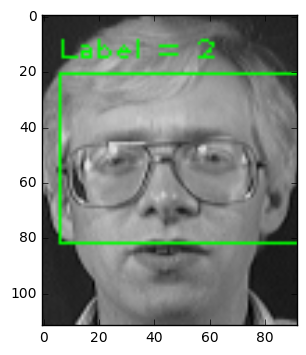

In [8]:
img = cv2.imread("training-data/s2/10.pgm")
face, rect = detect_face(img)

# face_recognizer.setThreshold(10)
label= face_recognizer.predict(face)
label_text = "Label = " + str(label)

draw_rectangle(img, rect)

draw_text(img, label_text, rect[0], rect[1]-5)

plt.imshow(img)
cv2.imshow("Predicted face", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.destroyAllWindows()